In [12]:
!pip install opencv-python-headless numpy matplotlib pywt

!pip install PyWavelets


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pywt (from versions: none)
ERROR: No matching distribution found for pywt
Defaulting to user installation because normal site-packages is not writeable


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [14]:
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)

In [15]:
h, w = image.shape
if h % 2 == 1:
    h += 1
if w % 2 == 1:
    w += 1
padded_image = cv2.copyMakeBorder(image, 0, h - image.shape[0], 0, w - image.shape[1], cv2.BORDER_CONSTANT, value=0)

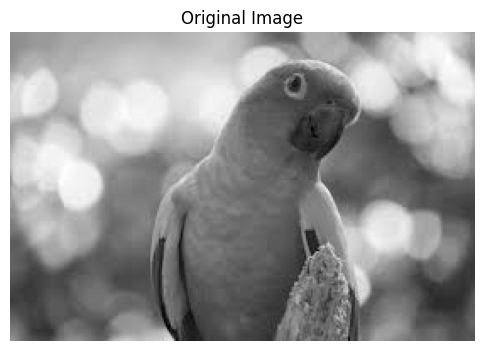

In [16]:
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

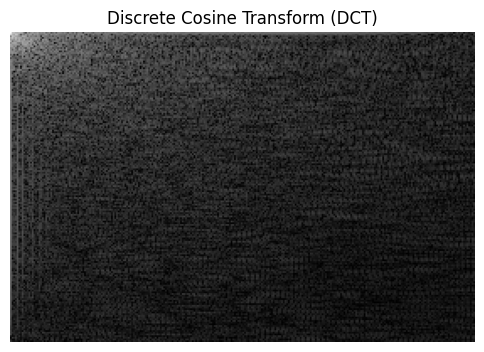

In [17]:
dct_image = cv2.dct(np.float32(padded_image))
plt.figure(figsize=(6,6))
plt.imshow(np.log(abs(dct_image) + 1), cmap='gray')
plt.title('Discrete Cosine Transform (DCT)')
plt.axis('off')
plt.show()

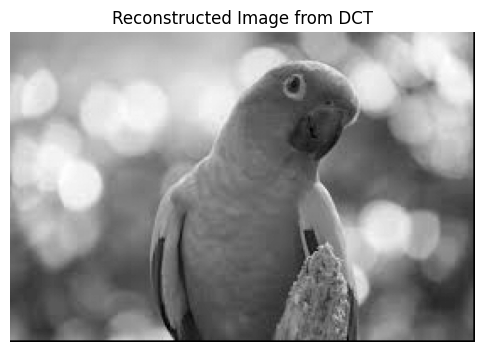

In [18]:
idct_image = cv2.idct(dct_image)
plt.figure(figsize=(6,6))
plt.imshow(np.uint8(idct_image), cmap='gray')
plt.title('Reconstructed Image from DCT')
plt.axis('off')
plt.show()


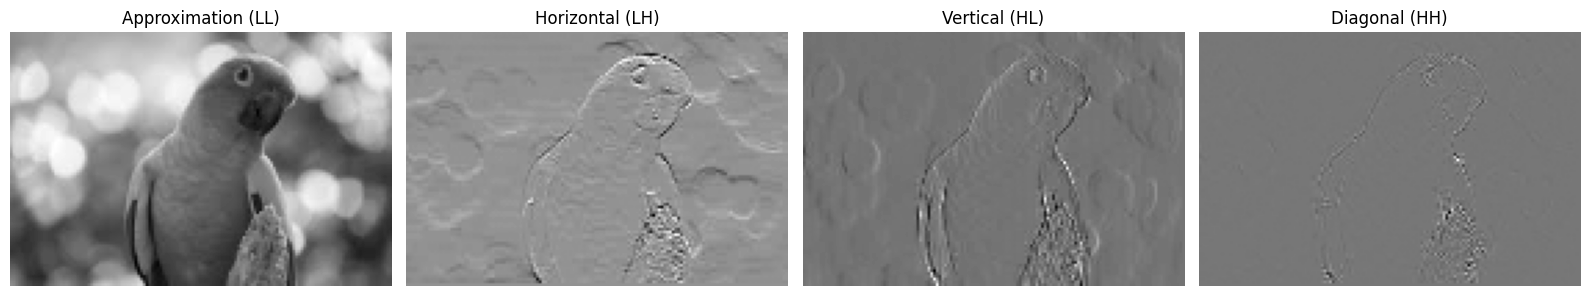

In [19]:
coeffs2 = pywt.dwt2(image, 'haar')
LL, (LH, HL, HH) = coeffs2

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(LL, cmap='gray')
axes[0].set_title('Approximation (LL)')
axes[1].imshow(LH, cmap='gray')
axes[1].set_title('Horizontal (LH)')
axes[2].imshow(HL, cmap='gray')
axes[2].set_title('Vertical (HL)')
axes[3].imshow(HH, cmap='gray')
axes[3].set_title('Diagonal (HH)')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

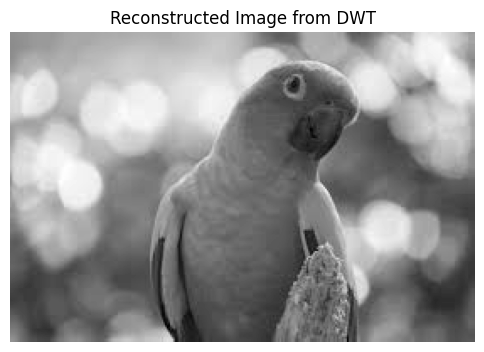

In [20]:
reconstructed_image = pywt.idwt2(coeffs2, 'haar')
plt.figure(figsize=(6,6))
plt.imshow(np.uint8(reconstructed_image), cmap='gray')
plt.title('Reconstructed Image from DWT')
plt.axis('off')
plt.show()